# Librerias

In [1]:
import importlib
import os, shutil
import numpy as np
import pandas as pd

from tkinter import *
from tkinter.messagebox import askokcancel

from IPython.display import clear_output

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'browser'

import matplotlib.pyplot as plt   # plotting

import rai_exp_2023_sivarita as exp
importlib.reload(exp)

import Sivarita
importlib.reload(Sivarita)

<module 'Sivarita' from 'c:\\repositorios\\rai_exp_2023_sivarita\\Sivarita.py'>

# Preparar datos

Sincronizar los datos de la carpeta <font color='orange'>**/\_data\_**</font> con la carpeta <font color='orange'>**/Experimentaciones/2023_sivarita/\_data\_**</font> de teams.

<font color='red'>**[IMPORTANTE]**</font> Es necesario tener sincronizado el canal [Experimentaciones](https://miumh.sharepoint.com/:f:/s/NBIO/ErXH5_wtbyZBpVINdmT_GRUBNEXJmMrEtJXeEJYZERJYrA?e=WnxzMY) de Teams con el ordenador.

In [2]:
if not "dataSyncCheck" in locals():
    exp.downloadDataFromTeams("/2023_sivarita/_data_")

dataSyncCheck = True

Cargar excel con los usuarios

In [3]:
path = "./_data_/"

df_brazo = pd.read_excel(path + "participantes_datos_analisis.xlsx")
df_brazo.sample(9)

,nombre,ID,brazo afectado,FM,grupo
6,Lusia Maria_Pereiro Sousa,7.0,L,29,moderado
19,NaN,NaN,NaN,NaN,NaN
33,Maria Soledad_Miranda Rosado,33.0,NaN,66,leve
2,Ana_Adsuar,3.0,.,66,leve
26,Francisco Javier_Fernandez Lerma,26.0,NaN,66,leve
1,Vicenta_Beneyto,2.0,R,66,leve
31,Francisco_Mico Porta,31.0,NaN,63,leve
13,María _Martinez,14.0,R,66,leve
18,NaN,NaN,NaN,NaN,NaN


Cargar trayectorias usuarios sanos

In [ ]:
#Datos trayectorias usuarios sanos
# df_csv =  pd.read_csv('./tareas/tarea_12.csv')
# df_csv = df_csv.drop(columns=['ts'])


# df_csv['q1'] = df_csv['q1'].multiply(180 / np.pi)
# df_csv['q2'] = df_csv['q2'].multiply(180 / np.pi)
# df_csv['q3'] = df_csv['q3'].multiply(180 / np.pi)
# df_csv['q4'] = df_csv['q4'].multiply(180 / np.pi)
# df_csv['q5'] = df_csv['q5'].multiply(180 / np.pi)
# df_csv['q6'] = df_csv['q6'].multiply(180 / np.pi)
# df_csv['q7'] = df_csv['q7'].multiply(180 / np.pi)

# # Plot the time series
# plt.style.use('fivethirtyeight')
# df_csv.plot(subplots=True,
#         layout=(4, 3),
#         figsize=(22,22),
#         fontsize=10, 
#         linewidth=2,
#         sharex=False,
#         title='Visualization of the mean trajectories')
# plt.show()







Cargar datos usuarios

In [5]:
#Path
path = "./_data_/Usuarios/"

#Cargar datos
df_data = exp.loadData(path)
df_data.sample(5)

,usuario,sesion,actividad,tipo_actividad,upper_size,fore_size,brazo,num_rep,dataFrame,dataFrameIA
333,Rosa_Ivorra,2023_5_19_11_18_25,PaintForms,CUADRADO,270.0,270.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
337,Rosa_Ivorra,2023_5_19_11_23_26,TouchGame,CABEZA,270.0,270.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
303,María _Martinez,2023_3_27_16_8_45,MoveGlass,BEBER,310.0,250.0,R,4.0,q1 q2 q3 q...,tarea data_org_1 data_pred_1 data_org_2 ...
255,Lusia Maria_Pereiro Sousa,2023_4_21_12_4_42,MoveGlass,BEBER,290.0,280.0,L,4.0,q1 q2 q3 ...,"Empty DataFrame Columns: [tarea, data_org_1, d..."
126,Anissa_Benssuz,2023_3_27_9_26_10,TouchGame,NARIZ,270.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...


Filtrar datos erróneos

In [6]:
count_vacio = 0
count_correcto = 0

for i_row in range(df_data.shape[0]):
    if df_data.dataFrameIA[i_row].empty is True:
        df_data = df_data.drop(i_row)
        count_vacio = count_vacio + 1
    else:
        count_correcto = count_correcto + 1

df_data.reset_index(drop=True, inplace=True)
print("Correctos: {0}".format(count_correcto))
print("Vacíos: {0}".format(count_vacio))
df_data.sample(5)



Correctos: 262
Vacíos: 115


,usuario,sesion,actividad,tipo_actividad,upper_size,fore_size,brazo,num_rep,dataFrame,dataFrameIA
71,Angeles_Cita Garrido,2023_4_24_12_2_15,PaintForms,CÍRCULO,250.0,240.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
101,Carmen _Saez,2023_3_23_12_7_13,Move_Cube,DESPLAZAR,290.0,260.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
138,Devra_Mendez Marin,2023_5_8_16_34_14,TouchGame,NARIZ,315.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
201,Lusia Maria_Pereiro Sousa,2023_3_23_13_5_53,TouchGame,NARIZ,290.0,280.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
250,Vicenta_Beneyto,2023_4_21_9_4_59,Move_Cube,SORTEAR,300.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...


# Procesar Datos

In [7]:
# Obtener los rangos articulares para cada paciente
df_params = exp.process_all_params(df_data)
df_params.sample(5)

,usuario,session,activity,tipo_actividad,brazo,DTW_error,Porcentaje_pred,MAX_Q1,MAX_Q2,MAX_Q3,...,MAX_Q5,MAX_Q6,MAX_Q7,MIN_Q1,MIN_Q2,MIN_Q3,MIN_Q4,MIN_Q5,MIN_Q6,MIN_Q7
82,Anissa_Benssuz,2023_3_27_9_9_49,Move_Cube,DESPLAZAR,L,7.515244,0.000000,41.372127,38.203026,-2.631461,...,157.176694,33.127310,29.136657,18.493164,18.121911,-47.228486,-23.254440,44.790504,-0.504684,-10.596200
57,Angela_Mayor,2023_6_19_9_7_43,TouchGame,HOMBRO,R,9.102691,0.000000,42.428266,33.073376,-79.316988,...,97.418988,-23.509010,59.328805,-16.115184,-12.264410,-114.109395,9.952671,39.084743,-52.294917,4.941331
140,Filomena_Almansa Consuegra,2023_3_29_15_41_53,Move_Cube,DESPLAZAR,R,36.501932,79.166667,25.195697,44.869496,-47.619878,...,392.005604,-52.221865,365.884063,-9.525859,21.154322,-104.967829,-0.406991,30.336427,-127.455720,10.002983
209,Lusia Maria_Pereiro Sousa,2023_4_21_12_24_45,TouchGame,NARIZ,L,12.538523,0.000000,72.769464,35.390959,38.042582,...,129.622563,-8.700029,-17.188152,17.580781,2.417626,-26.791075,-4.362858,43.435789,-20.572388,-41.370260
76,Anissa_Benssuz,2023_3_27_8_57_17,MoveGlass,BEBER,L,18.573746,20.833333,41.481255,40.398754,34.486747,...,116.710586,32.102773,0.712282,13.426504,13.610096,2.631082,-35.593122,44.163898,-9.120954,-27.183611


Filtrar por Usuario

In [14]:
df_user = df_params[df_params['usuario'] == 'Lusia Maria_Pereiro Sousa']
print(df_user)


                       usuario             session    activity tipo_actividad  \
173  Lusia Maria_Pereiro Sousa   2023_3_27_9_49_42   MoveGlass          BEBER   
174  Lusia Maria_Pereiro Sousa   2023_3_27_9_50_45   MoveGlass        LLENADO   
175  Lusia Maria_Pereiro Sousa   2023_4_21_12_7_42   MoveGlass          BEBER   
176  Lusia Maria_Pereiro Sousa   2023_4_21_12_9_14   MoveGlass        LLENADO   
177  Lusia Maria_Pereiro Sousa   2023_6_19_9_28_12   MoveGlass          BEBER   
178  Lusia Maria_Pereiro Sousa   2023_6_19_9_30_24   MoveGlass        LLENADO   
179  Lusia Maria_Pereiro Sousa  2023_3_23_12_49_18   Move_Cube        SORTEAR   
180  Lusia Maria_Pereiro Sousa   2023_3_27_9_52_10   Move_Cube      DEPOSITAR   
181  Lusia Maria_Pereiro Sousa   2023_3_27_9_52_58   Move_Cube      DEPOSITAR   
182  Lusia Maria_Pereiro Sousa   2023_3_27_9_54_28   Move_Cube        SORTEAR   
183  Lusia Maria_Pereiro Sousa   2023_3_27_9_55_34   Move_Cube      DESPLAZAR   
184  Lusia Maria_Pereiro Sou

Filtrar por Grupos

In [6]:
# for itere grupos
hawer = df_brazo.grupo.unique()
df_group = []
group_list = []
for group in hawer:
    # filtrar grupo
    group_list.append(group)
    df_group.append(exp.process_byGroups(df_brazo, df_params, group))

data = {
    'grupo': group_list,
    'dataframe': df_group
}

df = pd.DataFrame(data)
df.sample(3)




,grupo,dataframe
2,maximo,user mean_MAXQ1 mean_MAXQ2 me...
1,moderado,user mean_MAXQ1 mean...
0,leve,user mean_MAXQ1 mean_MAXQ2 mean...


# Gráfico DTW

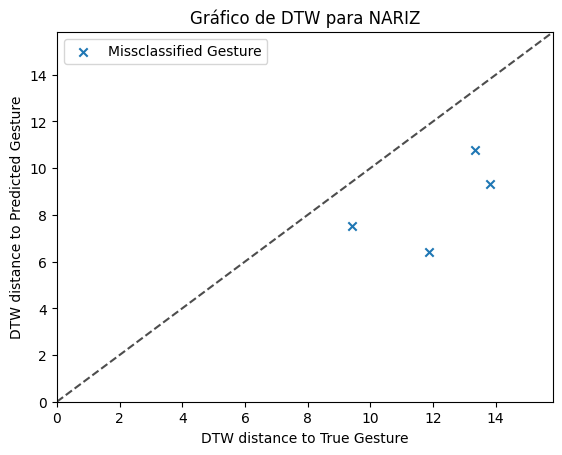

In [7]:
# Plot DTW
index = 63
df = df_data.dataFrameIA[index]
tarea = df_data.tipo_actividad[index]
Sivarita.plotDTWparam(df, tarea)
